## M5 Forecasting - Accuracy - EDA
Estimate the unit sales of Walmart retail goods

## Loading Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mat_dates
from matplotlib.ticker import FuncFormatter, PercentFormatter
import math
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', '{:.2f}'.format)
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image

## Loading Files

In [2]:
## Read files

##sell_prices.csv - Contains information about the price of the products sold per store and date.
selling_price = pd.read_csv("sell_prices.csv")

##calendar.csv - Contains information about the dates on which the products are sold.
calendar = pd.read_csv("calendar.csv")

##sales_train_evaluation.csv - Includes sales [d_1 - d_1941]
sales = pd.read_csv("sales_train_evaluation.csv")

In [3]:
## Viewing dataset
calendar.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [4]:
## Viewing dataset
sales.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0  ...       1       1       0       4       0   
4       CA    0    0    0    0  ...       0       0       0       2       1   

   d_1937  d_1938  d_1939  d_1940  d_1941  
0       0       3       3       0       1  
1       0       0       0       0       0  
2       0       2       3       0       1  
3       1       3       0       2       6  
4       0       0       2       1       0  

[5 rows x 1947 columns]

In [5]:
## Viewing dataset
selling_price.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

## Data Cleaning and Optimization

In [6]:
## Check for missing values
sales.isna().sum().sort_values()

id        0
d_1300    0
d_1299    0
d_1298    0
d_1297    0
         ..
d_637     0
d_636     0
d_635     0
d_663     0
d_1941    0
Length: 1947, dtype: int64

In [7]:
## Check for missing values
selling_price.isna().sum().sort_values()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [8]:
## Check for missing values
calendar.isna().sum().sort_values()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
snap_CA            0
snap_TX            0
snap_WI            0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
dtype: int64

In [9]:
## Filling the blank values in calendar 
calendar.fillna('No_event',inplace=True)
calendar.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1     No_event   
1  2011-01-30     11101     Sunday     2      1  2011  d_2     No_event   
2  2011-01-31     11101     Monday     3      1  2011  d_3     No_event   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4     No_event   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5     No_event   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0     No_event     No_event     No_event        0        0        0  
1     No_event     No_event     No_event        0        0        0  
2     No_event     No_event     No_event        0        0        0  
3     No_event     No_event     No_event        1        1        0  
4     No_event     No_event     No_event        1        0        1

In [10]:
## Underatand memory usage
sales.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 463.3 MB


In [11]:
## Underatand memory usage
selling_price.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 957.5 MB


In [12]:
## Underatand memory usage
calendar.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  1969 non-null   object
 8   event_type_1  1969 non-null   object
 9   event_name_2  1969 non-null   object
 10  event_type_2  1969 non-null   object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 980.6 KB


In [13]:
# program to convert byte size to B or KB or MB or GB.
# https://www.codegrepper.com/code-examples/python/convert+bytes+to+mb+python
def convertFloatToDecimal(f=0.0, precision=2):
    '''
    Convert a float to string of decimal.
    precision: by default 2.
    If no arg provided, return "0.00".
    '''
    return ("%." + str(precision) + "f") % f

def formatFileSize(size, sizeIn, sizeOut, precision=0):
    '''
    Convert file size to a string representing its value in B, KB, MB and GB.
    The convention is based on sizeIn as original unit and sizeOut
    as final unit. 
    '''
    assert sizeIn.upper() in {"B", "KB", "MB", "GB"}, "sizeIn type error"
    assert sizeOut.upper() in {"B", "KB", "MB", "GB"}, "sizeOut type error"
    if sizeIn == "B":
        if sizeOut == "KB":
            return convertFloatToDecimal((size/1024.0), precision)
        elif sizeOut == "MB":
            return convertFloatToDecimal((size/1024.0**2), precision)
        elif sizeOut == "GB":
            return convertFloatToDecimal((size/1024.0**3), precision)
    elif sizeIn == "KB":
        if sizeOut == "B":
            return convertFloatToDecimal((size*1024.0), precision)
        elif sizeOut == "MB":
            return convertFloatToDecimal((size/1024.0), precision)
        elif sizeOut == "GB":
            return convertFloatToDecimal((size/1024.0**2), precision)
    elif sizeIn == "MB":
        if sizeOut == "B":
            return convertFloatToDecimal((size*1024.0**2), precision)
        elif sizeOut == "KB":
            return convertFloatToDecimal((size*1024.0), precision)
        elif sizeOut == "GB":
            return convertFloatToDecimal((size/1024.0), precision)
    elif sizeIn == "GB":
        if sizeOut == "B":
            return convertFloatToDecimal((size*1024.0**3), precision)
        elif sizeOut == "KB":
            return convertFloatToDecimal((size*1024.0**2), precision)
        elif sizeOut == "MB":
            return convertFloatToDecimal((size*1024.0), precision)

Numerical Columns:
Depending on your environment, pandas automatically creates int32, int64, float32 or float64 columns for numeric ones. If you know the min or max value of a column, you can use a subtype which is less memory consuming. You can also use an unsigned subtype if there is no negative value.Here are the different subtypes you can use:
1. int8 / uint8 : consumes 1 byte of memory, range between -128/127 or 0/255
2. bool : consumes 1 byte, true or false
3. float16 / int16 / uint16: consumes 2 bytes of memory, range between -32768 and 32767 or 0/65535
4. float32 / int32 / uint32 : consumes 4 bytes of memory, range between -2147483648 and 2147483647
5. float64 / int64 / uint64: consumes 8 bytes of memory
6. If one of your column has values between 1 and 10 for example, you will reduce the size of that column from 8 bytes per row to 1 byte, which is more than 85% memory saving on that column!

In [14]:
# measuring file size before downcasting
OG_sales=formatFileSize(sales.memory_usage(index = True).sum(),'B','MB')
OG_prices=formatFileSize(selling_price.memory_usage(index = True).sum(),'B','MB')
OG_calendar=formatFileSize(calendar.memory_usage(index = True).sum(),'B','MB')

In [15]:
print("The original size of sales dataset is:",OG_sales,"MB")
print("The original size of sales dataset is:",OG_prices,"MB")
print("The original size of sales dataset is:",OG_calendar,"MB")

The original size of sales dataset is: 453 MB
The original size of sales dataset is: 209 MB
The original size of sales dataset is: 0 MB


## -- Downcasting

In [16]:
from downcast import reduce

In [17]:
## using reduce function to downcast the dataset i.e reduce size
sales_= reduce(sales)
prices_= reduce(selling_price)
calendar_= reduce(calendar)

In [18]:
import sys
# measure filesize after downcasting
DC_sales=formatFileSize(sales_.memory_usage(index = True).sum(),'B','MB')
DC_prices=formatFileSize(prices_.memory_usage(index = True).sum(),'B','MB')
DC_calendar=formatFileSize(calendar_.memory_usage(index = True).sum(),'B','MB')

In [19]:
print("The downcasted size of sales dataset is:",DC_sales,"MB")
print("The downcasted size of sales dataset is:",DC_prices,"MB")
print("The downcasted size of sales dataset is:",DC_calendar,"MB")

The downcasted size of sales dataset is: 96 MB
The downcasted size of sales dataset is: 46 MB
The downcasted size of sales dataset is: 0 MB


In [20]:
# https://plotly.com/python/bar-charts/
import plotly.graph_objects as go
dataset_name=['calender', 'selling_price', 'sales']
d1 = [OG_calendar, OG_prices, OG_sales]
d2 = [DC_calendar, DC_prices,DC_sales]
fig = go.Figure(data=[
    go.Bar(name='After Downcasting', x=dataset_name, y=d2,text=d2,textposition='auto'),
    go.Bar(name='Before Downcasting', x=dataset_name, y=d1,text=d1,textposition='auto')
])
# Change the bar mode
fig.update_xaxes(title_text='dataset name')
fig.update_yaxes(title_text='MB')
fig.update_layout(barmode='group')
fig.show()

## 
Conclusion:
We reduced the size of selling_price dataframe from 209 MB to 46 MB and size of sales dataset from 453 MB to 96 mb i.e 78% memory reduction for both the datasets

In [21]:
calendar_["date"].unique()

array(['2011-01-29T00:00:00.000000000', '2011-01-30T00:00:00.000000000',
       '2011-01-31T00:00:00.000000000', ...,
       '2016-06-17T00:00:00.000000000', '2016-06-18T00:00:00.000000000',
       '2016-06-19T00:00:00.000000000'], dtype='datetime64[ns]')

## Heirarchy of the Data

In [22]:
sales_gp = sales_.groupby(['state_id','store_id','cat_id','dept_id'],as_index=False)
sales_gp = sales_gp['item_id'].count().dropna()
sales_gp['US'] = 'US'
sales_gp = sales_gp[sales_gp['item_id']!=0] ## if we have the zero values, the weight sum would be zero and we would incurr an error while making the plot

fig = px.treemap(sales_gp, path=['US','state_id', 'store_id', 'cat_id', 'dept_id'], values='item_id',
                  color='item_id',
                  color_continuous_scale = 'RdBu',
                  title='Walmart: Distribution of items')
            
fig.update_layout(treemapcolorway = ["pink", "lightgray"])
fig.show()

In the data, there are 3 states, 10 stores, 3 categories, 7 departments, and 3049 items.

a. States are California (CA), Texas(TX), and Wisconsin(WI).

b. California has 4 stores-  CA_1, CA_2, CA_3, CA_4(CA), Texas has 3 stores - TX_1,TX_2, TX_3(TX) and Wisconsin has 3 stores- W1_1, WI_2, WI_3(WI).

c. There are 3 product Categories - FOODS, HOUSEHOLD, and HOBBIES.

d. Followinf are the Departments under 3 categories are FOODS_1, FOODS_2, FOODS_3(FOODS), HOUSEHOLD_1, HOUSEHOLD_2(HOUSEHOLD) AND HOBBIES_1, HOBBIES_2(HOBBIES).


## Sales pattern over the entire time frame

In [23]:
daily_overallsales = sales_.loc[:,'d_1':'d_1913'].aggregate(['sum'])
daily_overallsales

d_1    d_2    d_3    d_4    d_5    d_6    d_7    d_8    d_9   d_10  \
sum  32631  31749  23783  25412  19146  29211  28010  37932  32736  25572   

     ...  d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  \
sum  ...   41789   48362   51640   38059   37570   35343   35033   40517   

     d_1912  d_1913  
sum   48962   49795  

[1 rows x 1913 columns]

In [24]:
## Transposing the dataset
daily_overallsales = daily_overallsales.T.reset_index()

In [25]:
daily_overallsales

index    sum
0        d_1  32631
1        d_2  31749
2        d_3  23783
3        d_4  25412
4        d_5  19146
...      ...    ...
1908  d_1909  35343
1909  d_1910  35033
1910  d_1911  40517
1911  d_1912  48962
1912  d_1913  49795

[1913 rows x 2 columns]

In [26]:
## Renaming columns for better understanding
daily_overallsales.rename(columns={'sum':'Total_Sales','index':'d'}, inplace=True)

In [27]:
## merging with calendar dataset
daily_overallsales = daily_overallsales.merge(calendar_,on='d',how='left')

In [28]:
daily_overallsales

d  Total_Sales       date  wm_yr_wk    weekday  wday  month  year  \
0        d_1        32631 2011-01-29     11101   Saturday     1      1  2011   
1        d_2        31749 2011-01-30     11101     Sunday     2      1  2011   
2        d_3        23783 2011-01-31     11101     Monday     3      1  2011   
3        d_4        25412 2011-02-01     11101    Tuesday     4      2  2011   
4        d_5        19146 2011-02-02     11101  Wednesday     5      2  2011   
...      ...          ...        ...       ...        ...   ...    ...   ...   
1908  d_1909        35343 2016-04-20     11612  Wednesday     5      4  2016   
1909  d_1910        35033 2016-04-21     11612   Thursday     6      4  2016   
1910  d_1911        40517 2016-04-22     11612     Friday     7      4  2016   
1911  d_1912        48962 2016-04-23     11613   Saturday     1      4  2016   
1912  d_1913        49795 2016-04-24     11613     Sunday     2      4  2016   

     event_name_1 event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  \
0        No_event     No_event     No_event     No_event        0        0   
1        No_event     No_event     No_event     No_event        0        0   
2        No_event     No_event     No_event     No_event        0        0   
3        No_event     No_event     No_event     No_event        1        1   
4        No_event     No_event     No_event     No_event        1        0   
...           ...          ...          ...          ...      ...      ...   
1908     No_event     No_event     No_event     No_event        0        0   
1909     No_event     No_event     No_event     No_event        0        0   
1910     No_event     No_event     No_event     No_event        0        0   
1911     No_event     No_event     No_event     No_event        0        0   
1912     No_event     No_event     No_event     No_event        0        0   

      snap_WI  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
1908        0  
1909        0  
1910        0  
1911        0  
1912        0  

[1913 rows x 15 columns]

In [29]:
## Filtering columns
daily_overallsales = daily_overallsales[['date','Total_Sales']]

In [30]:
## Converting to datetime data type
daily_overallsales['date'] = pd.to_datetime(daily_overallsales['date'])

## Seprating X and Y for the graph
daily_dates = daily_overallsales['date']
daily_totalSales = daily_overallsales['Total_Sales']

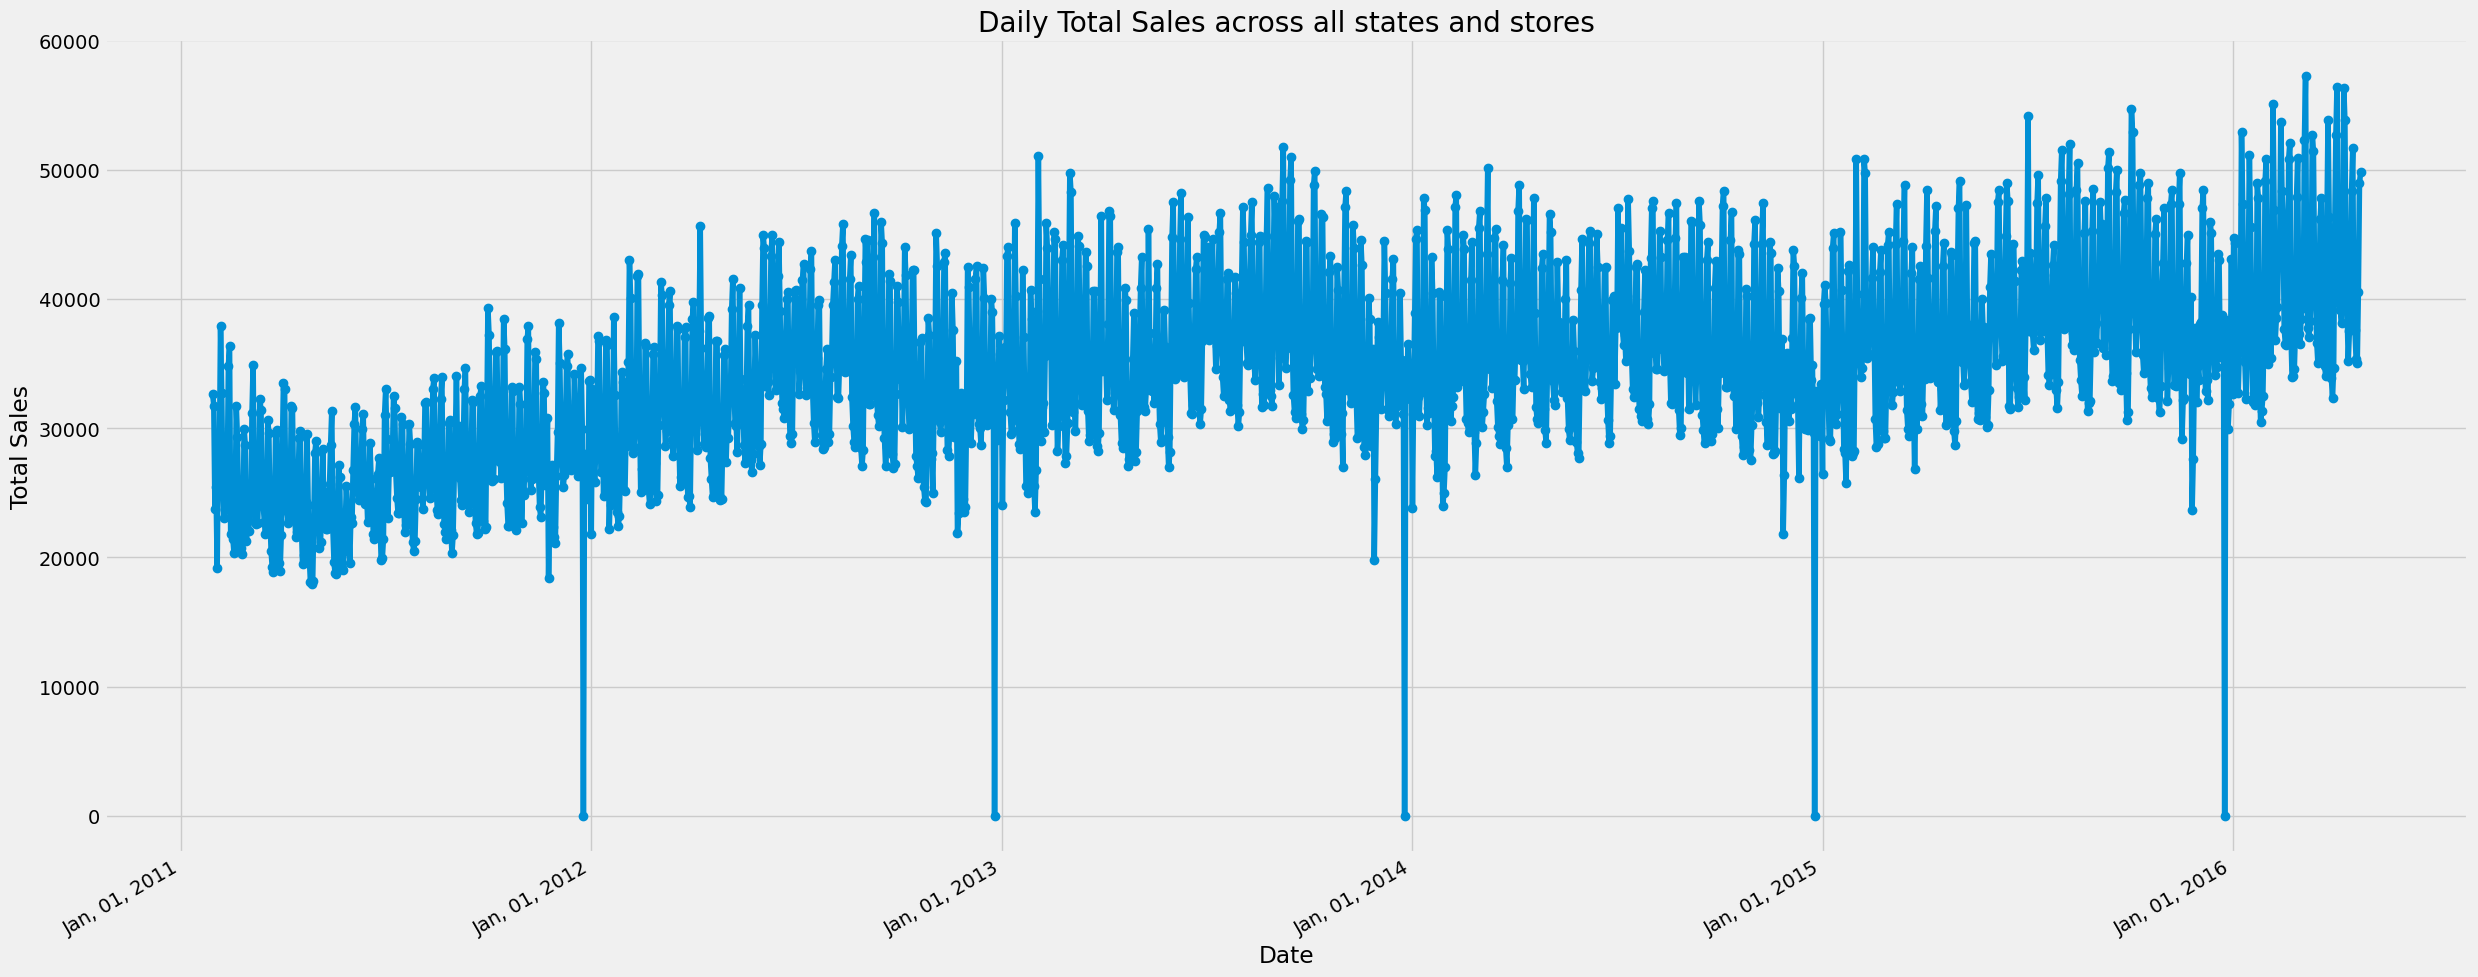

In [31]:
""" plot of Date Vs Total_sales """
plt.style.use('fivethirtyeight')
plt.plot_date(daily_dates,daily_totalSales,linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mat_dates.DateFormatter('%b, %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().set_size_inches(25, 10)
plt.title('Daily Total Sales across all states and stores')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

Observations
1. There is a slight upward trend in total sales from 2011 to 2016
2. Every new years 1st jan is marked with zero sales ( probably stores are closed on that day)

In [32]:
daily_overallsales

date  Total_Sales
0    2011-01-29        32631
1    2011-01-30        31749
2    2011-01-31        23783
3    2011-02-01        25412
4    2011-02-02        19146
...         ...          ...
1908 2016-04-20        35343
1909 2016-04-21        35033
1910 2016-04-22        40517
1911 2016-04-23        48962
1912 2016-04-24        49795

[1913 rows x 2 columns]

## Sales trend by Year

In [33]:
## Extracting year from date
daily_overallsales['year'] = daily_overallsales['date'].dt.year

In [34]:
daily_overallsales

date  Total_Sales  year
0    2011-01-29        32631  2011
1    2011-01-30        31749  2011
2    2011-01-31        23783  2011
3    2011-02-01        25412  2011
4    2011-02-02        19146  2011
...         ...          ...   ...
1908 2016-04-20        35343  2016
1909 2016-04-21        35033  2016
1910 2016-04-22        40517  2016
1911 2016-04-23        48962  2016
1912 2016-04-24        49795  2016

[1913 rows x 3 columns]

In [35]:
## Calculating sales by year
daily_overallsales_grp = daily_overallsales.groupby(['year'])

In [38]:
gf = daily_overallsales_grp.groups

In [39]:
""" plot of Years Vs Total_sales """
gf_val_lst = list(gf.values())

C:\Users\Owner\AppData\Local\Temp\ipykernel_10996\1078349848.py:5: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.



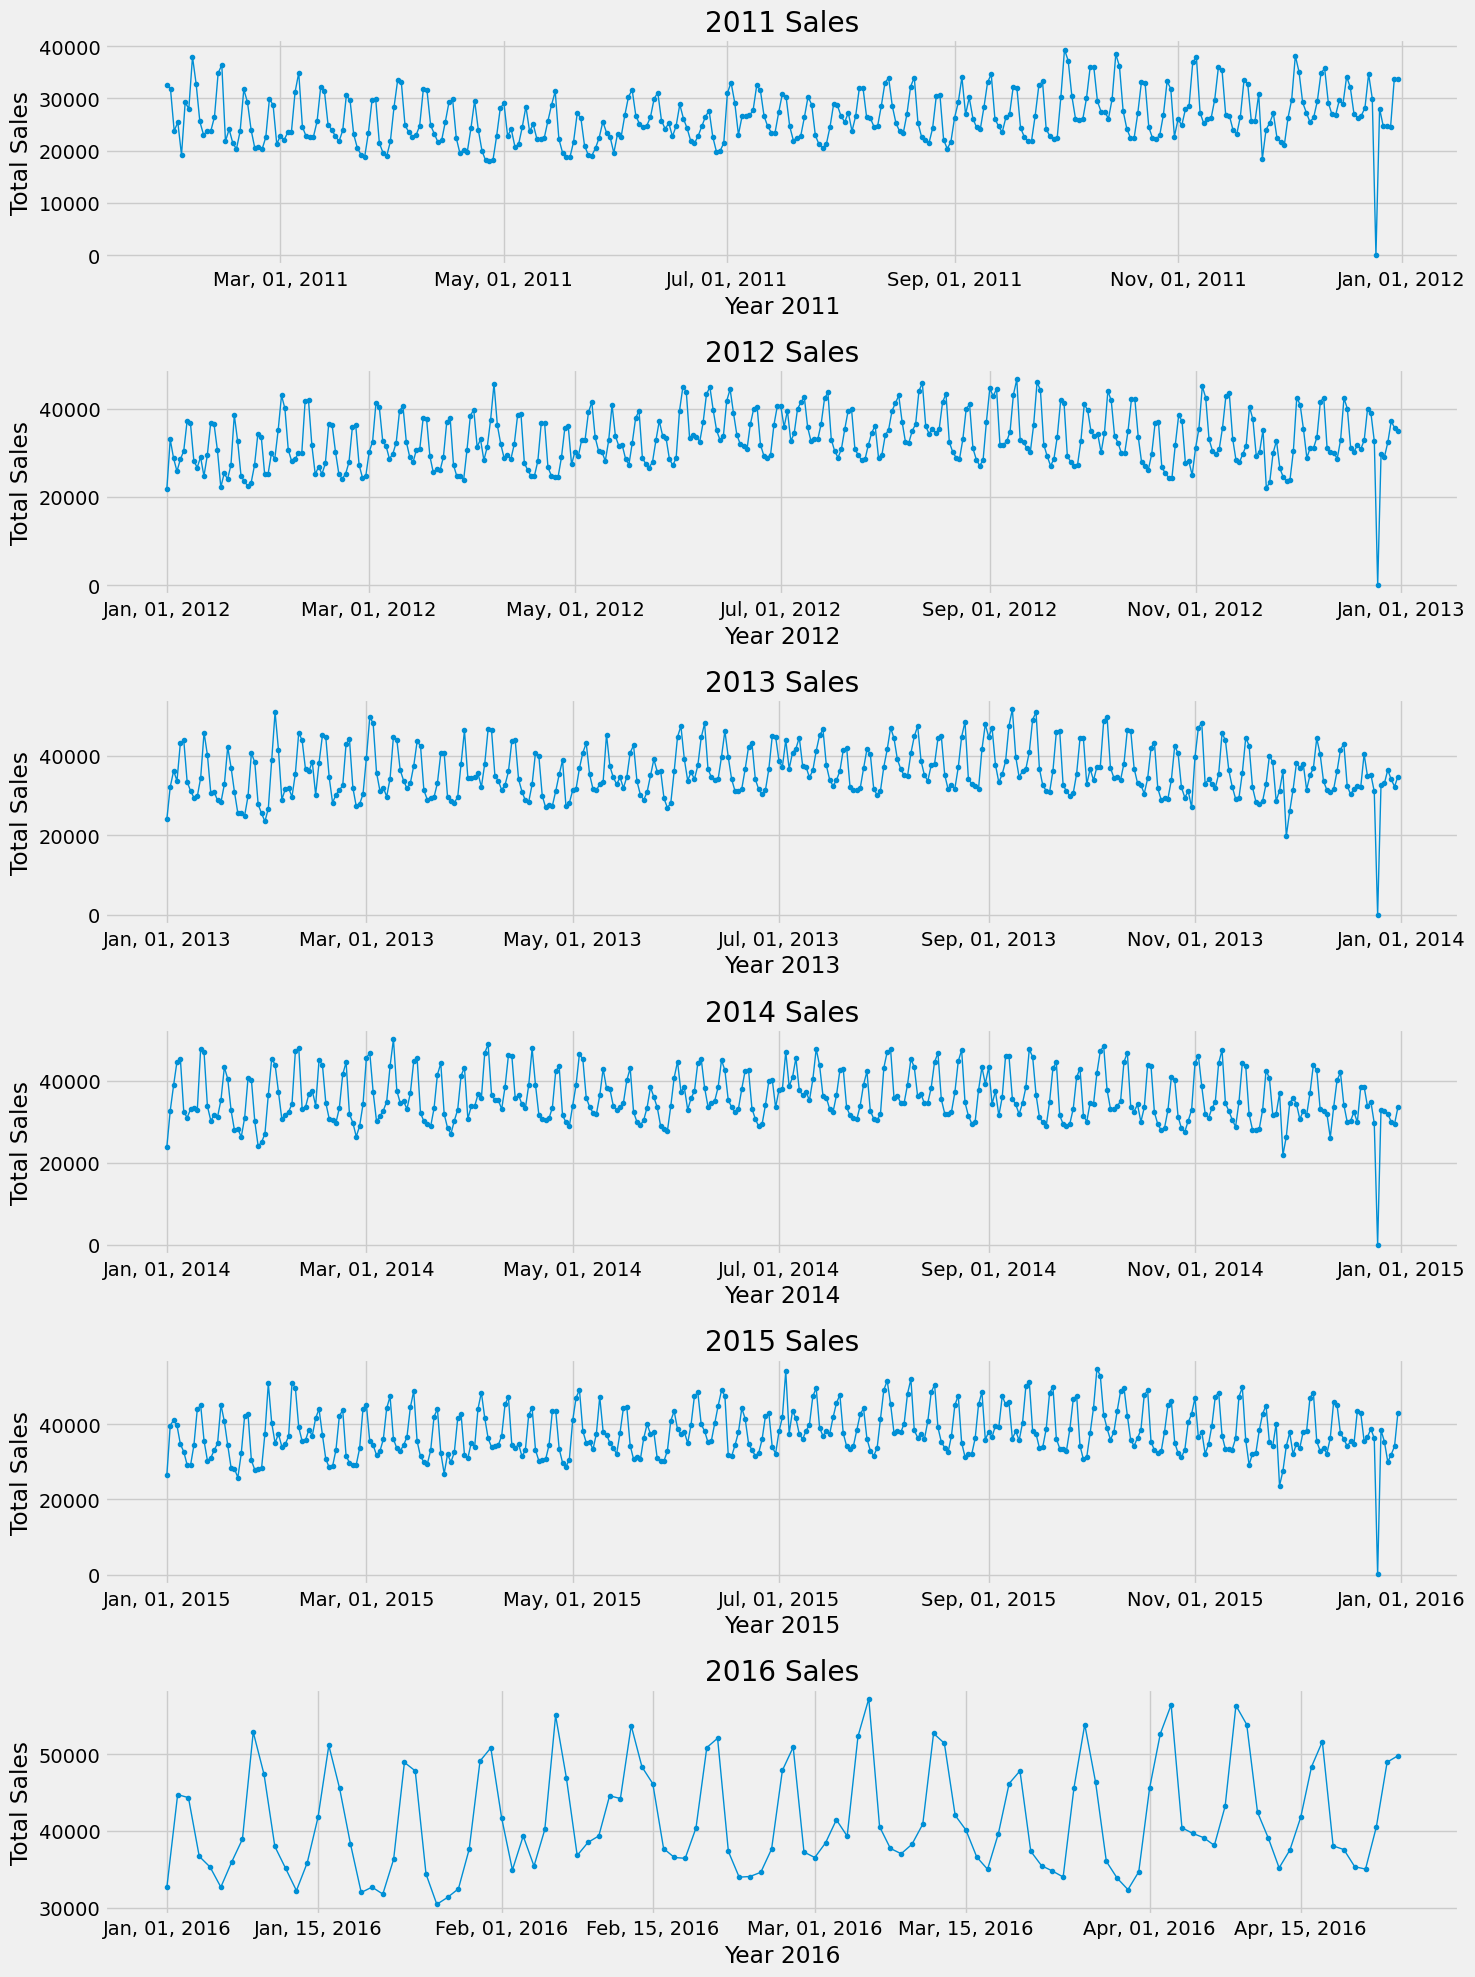

In [40]:
date_format = mat_dates.DateFormatter('%b, %d, %Y')
fig = plt.figure(figsize=(15, 20))
for i in range(6):
    ax = fig.add_subplot(6,1,i+1)
    plt.plot_date(daily_overallsales.iloc[gf_val_lst[i]]['date'],daily_overallsales.iloc[gf_val_lst[i]]['Total_Sales'],linestyle='solid',linewidth=1,marker='.')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().set_title(str(2011+i)+ ' Sales')
    plt.gca().set_xlabel('Year '+str(2011+i))
    plt.gca().set_ylabel('Total Sales')
plt.tight_layout()
plt.show()

Observations:
1. Similar pattern of overall sales across years with seasonality

2. Time series pattern is stationary.

## Sales trend by month

In [41]:
## Extracting month from date
daily_overallsales['month']=daily_overallsales['date'].dt.month_name()

## Summing sales by Month
daily_overallsales_gpm = daily_overallsales.groupby('month').agg({'Total_Sales':'sum'}).reset_index()

In [42]:
daily_overallsales_gpm

month  Total_Sales
0       April      5961011
1      August      5571730
2    December      5111972
3    February      5889589
4     January      5345511
5        July      5443975
6        June      5250212
7       March      6387210
8         May      5038097
9    November      4993624
10    October      5380589
11  September      5321889

In [43]:
#reference: https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
months_order = list(daily_overallsales['date'].dt.month_name().unique())

In [44]:
daily_overallsales_gpm.index = pd.CategoricalIndex(daily_overallsales_gpm.month, categories=months_order, ordered=True)

In [45]:
daily_overallsales_gpm

month  Total_Sales
month                            
April          April      5961011
August        August      5571730
December    December      5111972
February    February      5889589
January      January      5345511
July            July      5443975
June            June      5250212
March          March      6387210
May              May      5038097
November    November      4993624
October      October      5380589
September  September      5321889

In [46]:
daily_overallsales_gpm = daily_overallsales_gpm.sort_index()
daily_overallsales_gpm.reset_index(drop=True,inplace=True)

In [47]:
daily_overallsales_gpm

month  Total_Sales
0     January      5345511
1    February      5889589
2       March      6387210
3       April      5961011
4         May      5038097
5        June      5250212
6        July      5443975
7      August      5571730
8   September      5321889
9     October      5380589
10   November      4993624
11   December      5111972

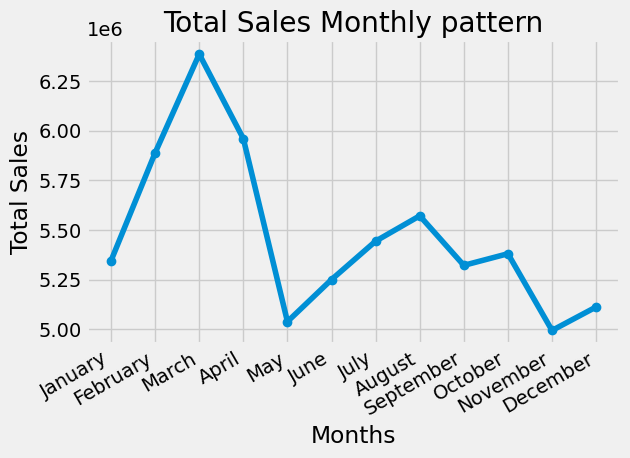

In [48]:
"""Plot of Months Vs Total Sales"""
plt.plot_date(daily_overallsales_gpm['month'],daily_overallsales_gpm['Total_Sales'],linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Total Sales Monthly pattern')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Conclusion:
1. Highest sales are in the month of march followed by august
2. May and november mark the lowest sales month
3. More sales happen in H1 than in H2

## Sales by week across stores

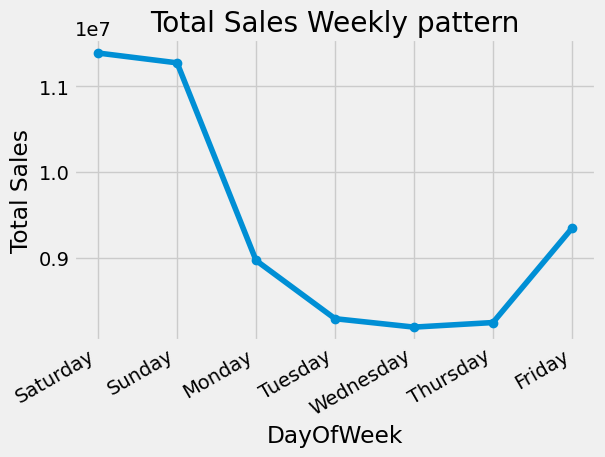

In [49]:
## Sales by week across stores
daily_overallsales['day_name']=daily_overallsales['date'].dt.day_name()
daily_overallsales_gpwd = daily_overallsales.groupby('day_name').agg({'Total_Sales':'sum'}).reset_index()

#reference: https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
day_name_order = list(daily_overallsales['date'].dt.day_name().unique())
daily_overallsales_gpwd.index = pd.CategoricalIndex(daily_overallsales_gpwd.day_name, categories=day_name_order, ordered=True)
daily_overallsales_gpwd = daily_overallsales_gpwd.sort_index()
daily_overallsales_gpwd.reset_index(drop=True,inplace=True)

"""Plot of Dayofweek Vs Total Sales"""
plt.plot_date(daily_overallsales_gpwd['day_name'],daily_overallsales_gpwd['Total_Sales'],linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Total Sales Weekly pattern')
plt.xlabel('DayOfWeek')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Conclusion:
1. Sales are highest on weekend days as compared to weekdays
2. Saturday sales are higher than Sunday sales

In [50]:
sales_

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  \
0         CA_1       CA    0    0    0    0  ...       2       4       0   
1         CA_1       CA    0    0    0    0  ...       0       1       2   
2         CA_1       CA    0    0    0    0  ...       1       0       2   
3         CA_1       CA    0    0    0    0  ...       1       1       0   
4         CA_1       CA    0    0    0    0  ...       0       0       0   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       1       0       3   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       0       0       1   
30488     WI_3       WI    0    0    0    0  ...       1       1       1   
30489     WI_3       WI    0    0    0    0  ...       1       2       0   

       d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
0           0       0       0       3       3       0       1  
1           1       1       0       0       0       0       0  
2           0       0       0       2       3       0       1  
3           4       0       1       3       0       2       6  
4           2       1       0       0       2       1       0  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       1       1       0       0       1       1  
30486       0       0       0       1       0       1       0  
30487       2       0       1       0       1       0       2  
30488       4       6       0       1       1       1       0  
30489       5       4       0       2       2       5       1  

[30490 rows x 1947 columns]

## Sales split by US States ( CA, TX, WI)

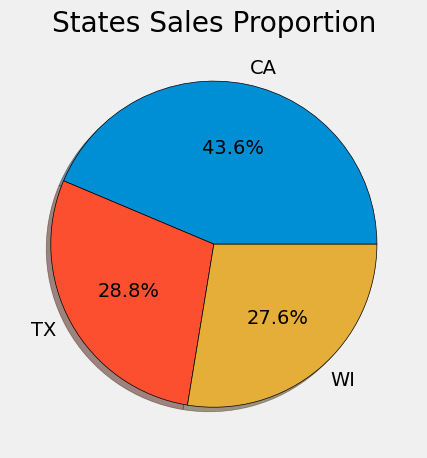

In [51]:
## California Sales
CA_sales_df = sales_[sales_["state_id"]=="CA"]
CA_total_sales = int(CA_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)

## Texas Sales
TX_sales_df = sales_[sales_["state_id"]=="TX"]
TX_total_sales = int(TX_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)

## Wisconsin Sales
WI_sales_df = sales_[sales_["state_id"]=="WI"]
WI_total_sales = int(WI_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)

"""plot of sales Proportion from each state"""
states_overallSales = [CA_total_sales,TX_total_sales,WI_total_sales]
states = ['CA','TX','WI']
plt.pie(states_overallSales,labels=states,shadow=True,
        autopct = '%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title('States Sales Proportion')
plt.tight_layout()
plt.show()

##
California has higher contributuion of sales as compared to Texas and Wisconsin.

California is largest state from USA in term of population and having population 37,999,878 ,Taxas is second largest state from USA in terms of population and having population 26,060,796 and wisconsin having 5,724,554 population.
so yes total sales in california is high but population is also hign in california.surprisingly wisconsin having less population as compared to taxas but still they have similar total sale

## Sales by store

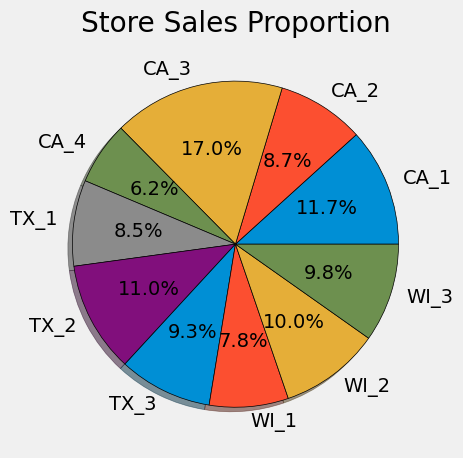

In [52]:
stores = sales_["store_id"].unique()
store_sales = []
for i in stores:
    store_level_sales = sales_[sales_["store_id"]==i]
    store_level_total_sales = int(store_level_sales.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)
    store_sales.append(store_level_total_sales)

plt.pie(store_sales,labels=stores,shadow=True,
        autopct = '%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title('Store Sales Proportion')
plt.tight_layout()
plt.show()

##
CA_4 has the max sales and CA_1 has least amount of sales

In [77]:
## Sales by Category

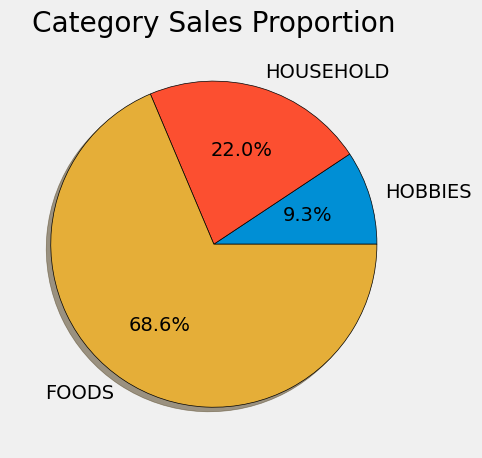

In [53]:
cat = sales_["cat_id"].unique()
cat_sales = []
for i in cat:
    cat_level_sales = sales_[sales_["cat_id"]==i]
    cat_level_total_sales = int(cat_level_sales.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)
    cat_sales.append(cat_level_total_sales)

plt.pie(cat_sales,labels=cat,shadow=True,
        autopct = '%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title('Category Sales Proportion')
plt.tight_layout()
plt.show()

##
Food category has the highest sales and hobbies have the least

## Sales by department

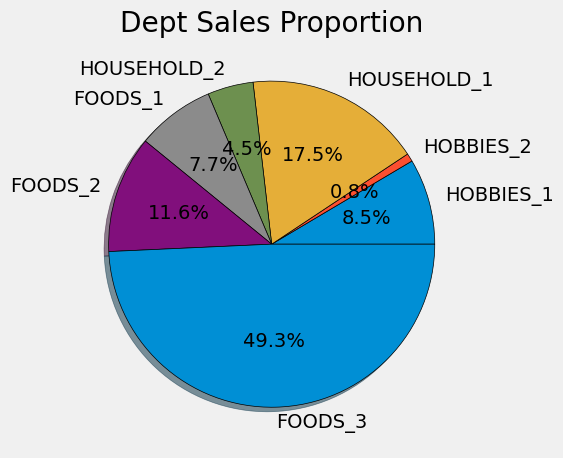

In [54]:
dept = sales_["dept_id"].unique()
dept_sales = []
for i in dept:
    dept_level_sales = sales_[sales_["dept_id"]==i]
    dept_level_total_sales = int(dept_level_sales.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)
    dept_sales.append(dept_level_total_sales)

plt.pie(dept_sales,labels=dept,shadow=True,
        autopct = '%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title('Dept Sales Proportion')
plt.tight_layout()
plt.show()

##
In food category, sales are mostly drivent by FOODS_3 category

## Product Category vs State sales

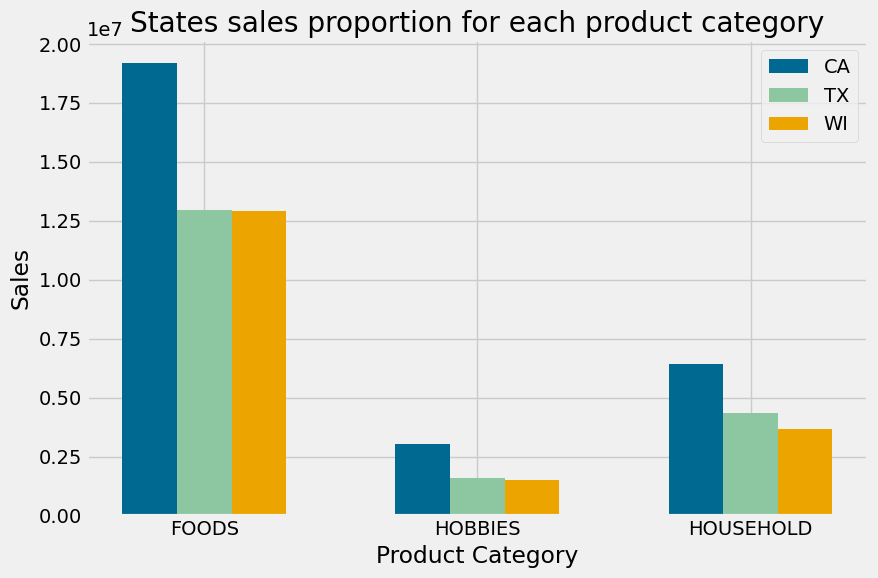

In [55]:
"""Here we get sales proportion of each satate for each product category """
sales_cat_state_grp = sales_.groupby(['cat_id','state_id'])
sales_cat_state_grp_idx = list(sales_cat_state_grp.groups.values())
cat_state_ky = list(sales_cat_state_grp.groups.keys())
cats = []
ca_sales = []
tx_sales = []
wi_sales = []
for i in range(len(cat_state_ky)):
    if cat_state_ky[i][0] not in cats:
        cats.append(cat_state_ky[i][0])
    cat_state_df = sales_.iloc[sales_cat_state_grp_idx[i]]
    if i%3 == 0:
        ca_sales.append(int(cat_state_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))
    elif i%3 == 1:
        tx_sales.append(int(cat_state_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))
    else:
        wi_sales.append(int(cat_state_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))

"""plot of sales proportion of each satate for each product category """

x_idx = np.arange(len(cats))
width = 0.2
plt.figure(figsize=(9,6))
plt.bar(x_idx - width, ca_sales,  width = width, color="#006992", label="CA")
plt.bar(x_idx, tx_sales, width = width, color="#8cc7a1", label="TX")
plt.bar(x_idx + width, wi_sales,  width = width, color="#ECA400", label="WI")

plt.legend()
plt.xticks(ticks=x_idx, labels=cats)
plt.title("States sales proportion for each product category")
plt.xlabel("Product Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

## SNAP Vs Non-SNAP day Sales proportion on each product category

C:\Users\Owner\AppData\Local\Temp\ipykernel_10996\3209817074.py:17: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



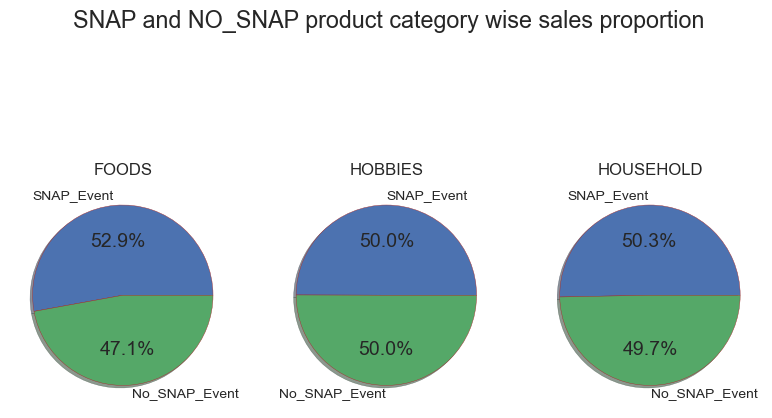

In [56]:
"""Group by cat_id for the sales proportion of each product category wrt SNAP Vs Non-SNAP days"""
sales_cat_grp = sales_.groupby('cat_id')
sales_cat_grp_idx = list(sales_cat_grp.groups.values())
cat_ky = list(sales_cat_grp.groups.keys())
snap_cat_sales = {}
for i in range(len(cat_ky)):
    sales_cat_grp_df = sales_.iloc[sales_cat_grp_idx[i]].loc[:,'d_1':'d_1913']
    sales_cat_grp_df = pd.melt(sales_cat_grp_df,var_name='d',value_name='sales')
    sales_cat_grp_df = sales_cat_grp_df.merge(calendar_,on='d',how='left')
    snap_cat_sales[cat_ky[i]] = {}
    snap_cat_sales[cat_ky[i]]['Total_Sales'] = int(sales_cat_grp_df[['sales']].sum().values)
    snap_cat_sales[cat_ky[i]]['SNAP_Sales'] = int(sales_cat_grp_df[(sales_cat_grp_df['snap_CA'] == 1) |(sales_cat_grp_df['snap_TX'] == 1)|(sales_cat_grp_df['snap_WI'] == 1)]['sales'].sum())

"""Plot of  sales proportion of each product category wrt SNAP Vs Non-SNAP days"""

plt.style.use('seaborn')
labels = ['SNAP_Event', 'No_SNAP_Event']
snap_cat_sales_ky = list(snap_cat_sales.keys())
FOODS_sales = [snap_cat_sales['FOODS']['SNAP_Sales'], snap_cat_sales['FOODS']['Total_Sales'] - snap_cat_sales['FOODS']['SNAP_Sales']]
HOBBIES_sales = [snap_cat_sales['HOBBIES']['SNAP_Sales'], snap_cat_sales['HOBBIES']['Total_Sales'] - snap_cat_sales['HOBBIES']['SNAP_Sales']]
HOUSEHOLD_sales = [snap_cat_sales['HOUSEHOLD']['SNAP_Sales'], snap_cat_sales['HOUSEHOLD']['Total_Sales'] - snap_cat_sales['HOUSEHOLD']['SNAP_Sales']]

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)

fig.suptitle('SNAP and NO_SNAP product category wise sales proportion')

ax1.pie(FOODS_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax1.set_title(snap_cat_sales_ky[0])

ax2.pie(HOBBIES_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax2.set_title(snap_cat_sales_ky[1])

ax3.pie(HOUSEHOLD_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax3.set_title(snap_cat_sales_ky[2])

plt.tight_layout()
plt.show()

##
Food sales are slightly higher on snap events

In [57]:
#1. converting the wide data format to long data format and merged all the datasets
# ie. data sales, calendar, and sell prices to a single dataframe using common “d_” key (day number).
#2. here we are also droping the rows which cantain atlest one NAN value. 
#3. https://www.geeksforgeeks.org/python-pandas-melt/ 
#4. https://www.geeksforgeeks.org/python-pandas-dataframe-dropna/
df_sales=pd.melt(sales_, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sales')

In [59]:
""" Merge sales, calender dataframes """
df_final = pd.melt(sales_, id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],
                         var_name='d',value_name='sales')
df_final = df_final.merge(calendar_,on='d',how='left')
df_final['date'] = pd.to_datetime(df_final['date'])

In [60]:
df_final= pd.merge(df_final, prices_,on=['store_id','item_id','wm_yr_wk'], how='left')

In [61]:
df_final.isnull().sum(axis = 0)

id                     0
item_id                0
dept_id                0
cat_id                 0
store_id               0
state_id               0
d                      0
sales                  0
date                   0
wm_yr_wk               0
weekday                0
wday                   0
month                  0
year                   0
event_name_1           0
event_type_1           0
event_name_2           0
event_type_2           0
snap_CA                0
snap_TX                0
snap_WI                0
sell_price      12299413
dtype: int64

In [62]:
df_final['sell_price'] = df_final['sell_price'].replace(np.nan,0)

In [63]:
df_final.isnull().sum(axis = 0)

id              0
item_id         0
dept_id         0
cat_id          0
store_id        0
state_id        0
d               0
sales           0
date            0
wm_yr_wk        0
weekday         0
wday            0
month           0
year            0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
snap_CA         0
snap_TX         0
snap_WI         0
sell_price      0
dtype: int64

## sales on each day of the month

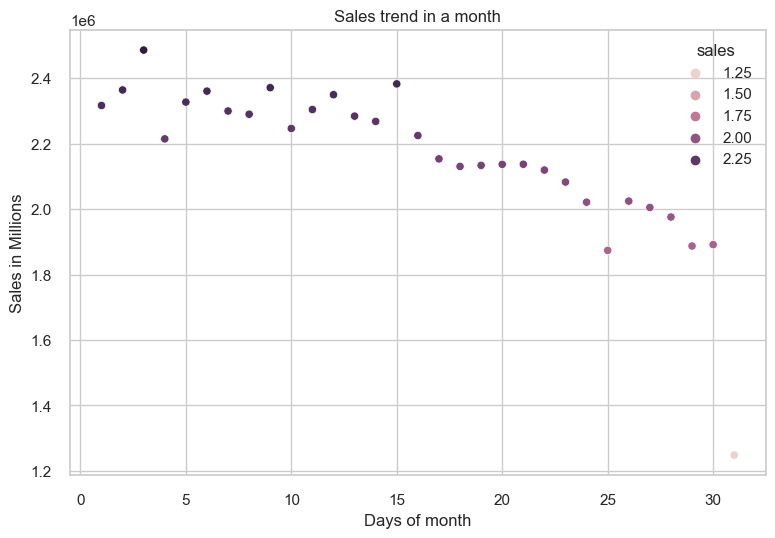

In [64]:
df_final['day_of_month'] = df_final['date'].dt.day
df_month = df_final.groupby('day_of_month').agg({'sales':'sum'}).reset_index()
sns.set(style="whitegrid")
sns.scatterplot(data=df_month, x="day_of_month", y="sales", hue="sales")
plt.title('Sales trend in a month')
plt.xlabel('Days of month')
plt.ylabel('Sales in Millions')
plt.show()

##
Sales are higher in the starting of the month and gradually decrease towards the end

## Revenue generated for each product category, each state, each store, each year

In [65]:
df_final['revenue'] = df_final.sales*df_final.sell_price

cat_revenue = df_final.groupby('cat_id').agg({'revenue':'sum'}).reset_index() 
store_revenue = df_final.groupby('store_id').agg({'revenue':'sum'}).reset_index() 
state_revenue = df_final.groupby('state_id').agg({'revenue':'sum'}).reset_index() 
year_revenue = df_final.groupby('year').agg({'revenue':'sum'}).reset_index() 
top20_revenue_prods = df_final['revenue'].sort_values(ascending=False).iloc[:10] 
top20_revenue_prods = df_final.loc[list(top20_revenue_prods.index)]

C:\Users\Owner\AppData\Local\Temp\ipykernel_10996\3875077451.py:6: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



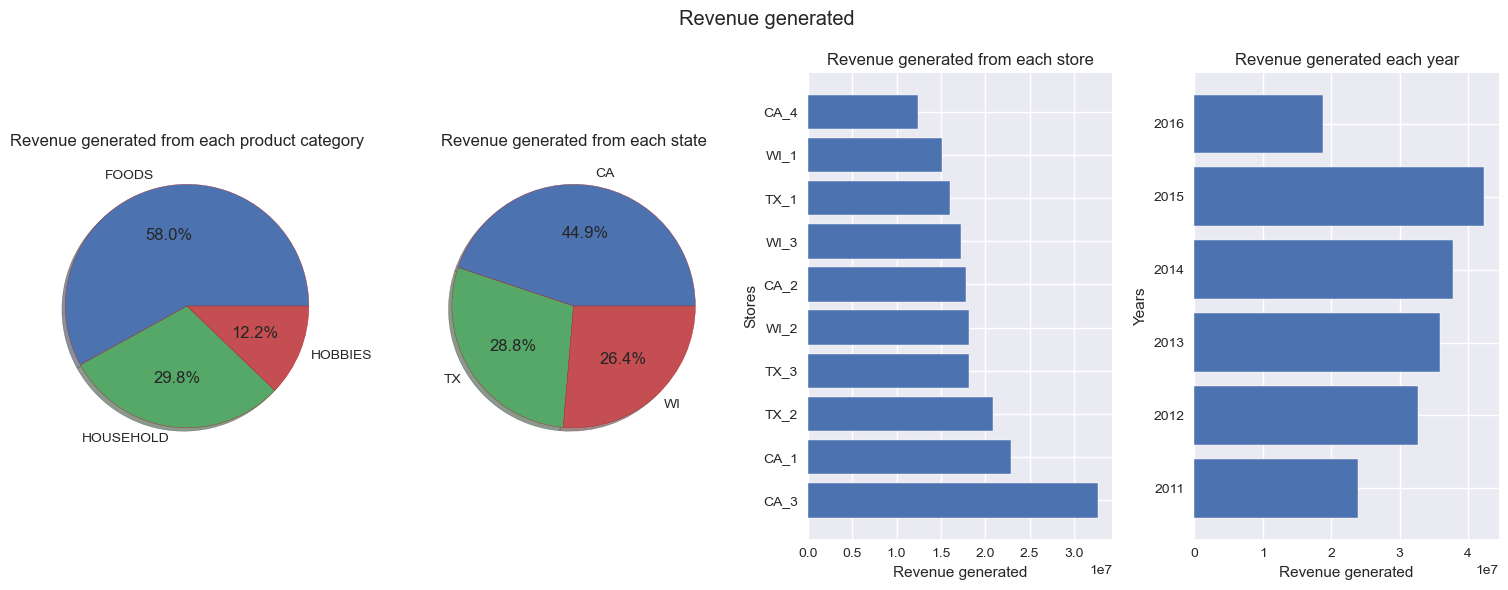

In [66]:
cat_revenue = cat_revenue.sort_values(by='revenue',ascending=False)
store_revenue = store_revenue.sort_values(by='revenue',ascending=False)
state_revenue = state_revenue.sort_values(by='revenue',ascending=False)
year_revenue = year_revenue.sort_values(by='revenue',ascending=False)

plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,6))

fig.suptitle('Revenue generated')

ax1.pie(cat_revenue.revenue.values, labels = cat_revenue.cat_id.values, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax1.set_title('Revenue generated from each product category')

ax2.pie(state_revenue.revenue.values,labels = state_revenue.state_id.values, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax2.set_title('Revenue generated from each state')

ax3.barh(store_revenue.store_id.values, store_revenue.revenue.values)
ax3.set_title('Revenue generated from each store')
ax3.set_xlabel('Revenue generated')
ax3.set_ylabel('Stores')

ax4.barh(year_revenue.year.values, year_revenue.revenue.values)
ax4.set_title('Revenue generated each year')
ax4.set_xlabel('Revenue generated')
ax4.set_ylabel('Years')

plt.tight_layout()
plt.show()


## 
1. Most of the revenue is generated from food items
2. CA_3 is the highest revenue generating store
3. Sales have constantly increased from 2011 to 2015
4. California's contribution is more towards total revenue, texas and wisconsin contribute equally

## Impact of events on sales

In [68]:
event_sales=df_final.groupby(['event_type_1'],as_index=False).agg(Mean_sale=('sales',np.mean))

In [69]:
event_sales

event_type_1  Mean_sale
0     Cultural       1.14
1     National       0.97
2     No_event       1.14
3    Religious       1.13
4     Sporting       1.17

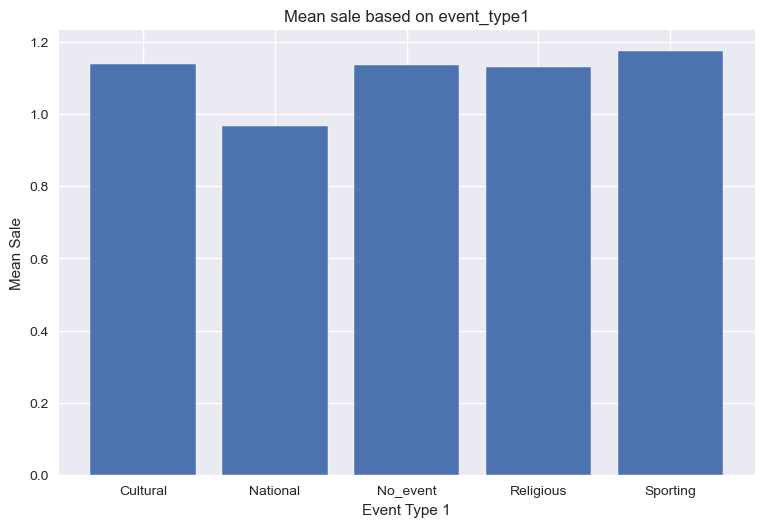

In [70]:
# Extract the data from the event_sales DataFrame
event_types = event_sales["event_type_1"]
mean_sales = event_sales["Mean_sale"]

# Set up the figure and axis
fig, ax = plt.subplots()

# Create the bar chart
ax.bar(event_types, mean_sales)

# Add labels and title
ax.set_xlabel("Event Type 1")
ax.set_ylabel("Mean Sale")
ax.set_title("Mean sale based on event_type1")

# Show the plot
plt.show()


## 
-- Sales are higher on sporting event type

In [71]:
event_type_sales=df_final.groupby(['event_name_1'],as_index=False).agg(Mean_sale=('sales',np.mean))

In [72]:
event_type_sales

event_name_1  Mean_sale
0          Chanukah End       1.10
1             Christmas       0.00
2         Cinco De Mayo       1.13
3           ColumbusDay       1.15
4                Easter       1.30
5           Eid al-Fitr       1.16
6             EidAlAdha       1.13
7          Father's day       1.20
8             Halloween       0.99
9       IndependenceDay       1.11
10             LaborDay       1.38
11            LentStart       1.01
12            LentWeek2       0.98
13  MartinLutherKingDay       1.09
14          MemorialDay       1.07
15         Mother's day       1.18
16         NBAFinalsEnd       1.10
17       NBAFinalsStart       1.05
18              NewYear       0.85
19             No_event       1.14
20    OrthodoxChristmas       1.09
21       OrthodoxEaster       1.35
22           Pesach End       1.19
23        PresidentsDay       1.13
24            Purim End       1.18
25       Ramadan starts       1.14
26        StPatricksDay       1.10
27            SuperBowl       1.34
28         Thanksgiving       0.69
29        ValentinesDay       1.10
30          VeteransDay       1.15

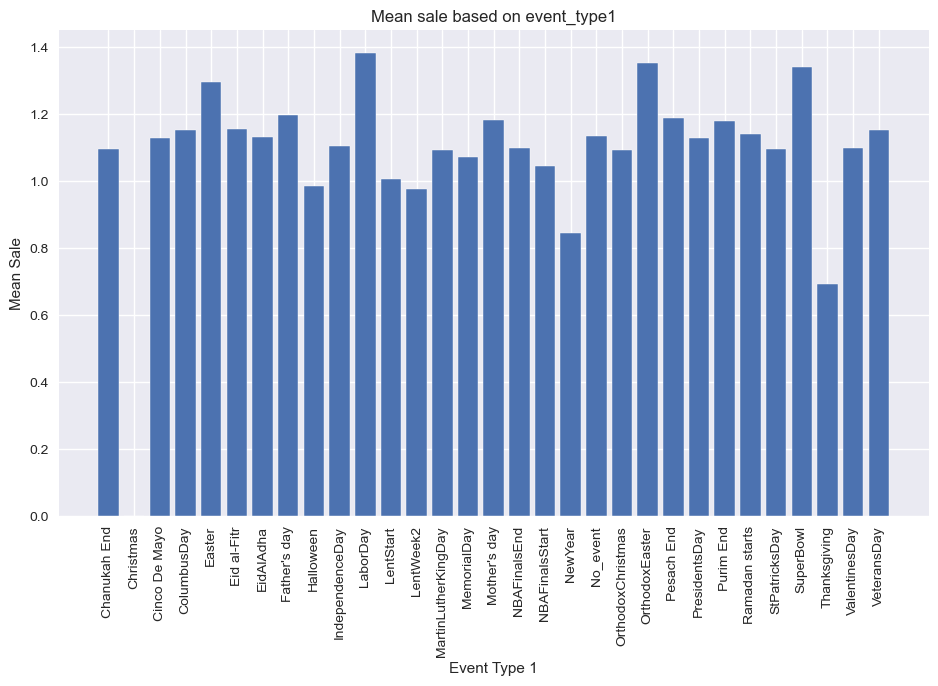

In [76]:
# Extract the data from the event_sales DataFrame
event_types = event_type_sales["event_name_1"]
mean_sales = event_type_sales["Mean_sale"]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
ax.bar(event_types, mean_sales)

# Add labels and title
ax.set_xlabel("Event Type 1")
ax.set_ylabel("Mean Sale")
ax.set_title("Mean sale based on event_type1")

# Show the plot
plt.xticks(rotation=90)
plt.show()

## 
No sales on Christmas

## Summary of Observations/Conclusions:
1. Sales pattern of Walmart observed an upward trend over the years, with zero sales on Christmas and the first day of the year due to store closures.
2. Yearly seasonality was observed in sales data and each year's time series was stationary.
3. Overall, sales were highest in March and lowest in November, with weekends seeing higher sales than weekdays, and Friday sales being slightly higher than other weekdays.
4. California had the highest sales and revenue, while Texas and Wisconsin had almost equal sales and revenue.
5. Food products accounted for 70% of sales but only 58% of revenue.
6. SNAP days had slightly higher sales than non-SNAP days in all three states, and overall sales and revenue patterns were similar across all product categories.
7. Daily sales patterns were non-periodic for each product, with increases in sales during sporting and cultural events and decreases during national holidays.
8. Sales were highest at the start of the month and decreased gradually towards the end of the month, with SNAP days seeing an increase in sales of at least 4% and up to 30%.
9.The top highest daily sales were for Food products, with California and Texas being the top-selling states.